In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, precision_score
import warnings
from sklearnex import patch_sklearn
from sklearn.decomposition import PCA

patch_sklearn() 
warnings.filterwarnings("ignore")

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
# read file
data_file = "./winequality/winequality-white.csv"
df = pd.read_csv(data_file, sep=";")

#get X and y
X = df.drop(columns=['quality'])
y = df['quality']

# split dataset into train data(80%) and test data(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [3]:
# normalization
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [4]:
# standardization
scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_train)
X_test_standard = scaler.transform(X_test)

In [11]:
pca = PCA(n_components=7)
pca.fit(X_train_normalized)
X_train_pca = pca.transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

In [6]:
RF_criterion = 'entropy'     #'entropy' or 'gini'
#RF_estimators = 365
#RF_depth = 24
#RF_samples_split = 2
#RF_samples_leaf = 1 

In [7]:
RF_accuracy = []
RF_recall = []
RF_f1 = []
RF_precision = []
for i in range(1,500,10):
    RF_model = RandomForestClassifier(n_estimators=i,
                                      criterion=RF_criterion,                                    
                                      random_state = 0)
    RF_model.fit(X_train_pca,y_train)
    y_pred = RF_model.predict(X_test_pca)
    
    accuracy = accuracy_score(y_test, y_pred)
    RF_accuracy.append([i,accuracy])
    
    precision = precision_score(y_test, y_pred, average='weighted')
    RF_precision.append([i,precision])
    
    recall = recall_score(y_test, y_pred, average='weighted')
    RF_recall.append([i,recall])
    
    f1 = f1_score(y_test, y_pred, average='weighted')
    RF_f1.append([i,f1])


最优参数以及最高得分: [231.          0.7074308]


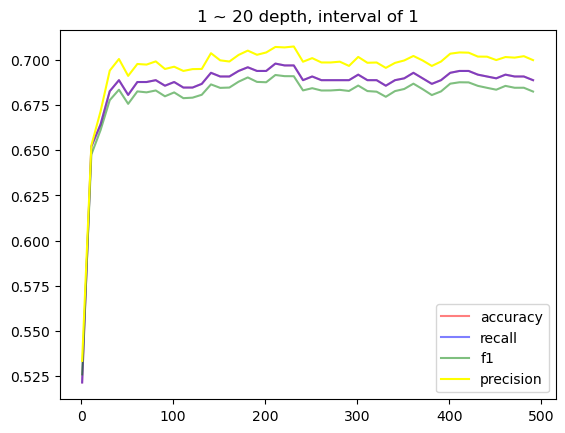

In [8]:
RF_accuracy = np.array(RF_accuracy)
RF_recall = np.array(RF_recall)
RF_f1 = np.array(RF_f1)
RF_precision = np.array(RF_precision)

max_score = np.where(RF_precision==np.max(RF_precision[:,1]))[0][0]
print("最优参数以及最高得分:",RF_precision[max_score]) 

plt.plot(RF_accuracy[:,0], RF_accuracy[:,1], color='red', alpha=0.5)
plt.plot(RF_recall[:,0], RF_recall[:,1], color='blue', alpha=0.5)
plt.plot(RF_f1[:,0], RF_f1[:,1], color='green', alpha=0.5)
plt.plot(RF_precision[:,0], RF_precision[:,1], color='yellow')
plt.legend(labels=["accuracy","recall","f1", "precision"],loc="lower right")
plt.title("1 ~ 20 depth, interval of 1")
plt.show()

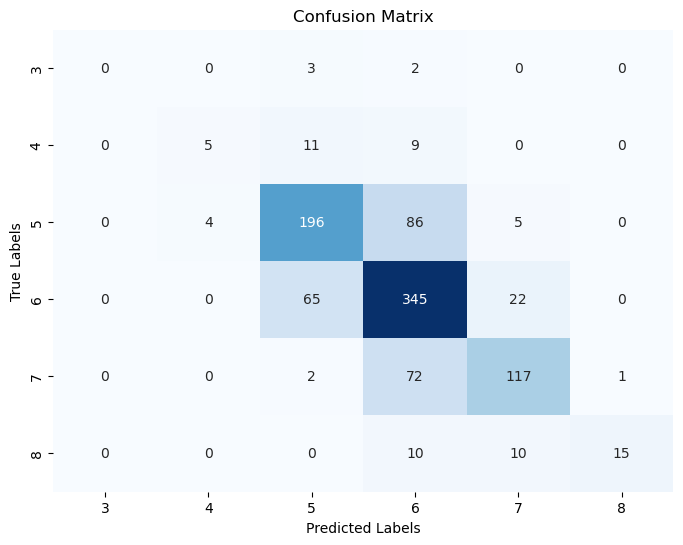

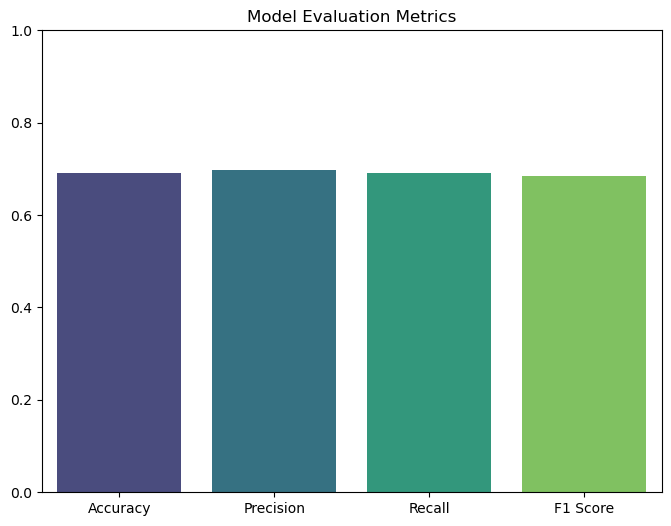

Random_Forest's Accuracy is: 0.6918367346938775
Random_Forest's Precision is:  0.6968419763869028
Random_Forest's Recall score is: 0.6918367346938775
Random_Forest's f1 score is: 0.6841030985190374


In [13]:
RF_criterion = 'entropy'     #'entropy' or 'gini'
RF_estimators = 300
RF_depth = 24
RF_samples_split = 2
RF_samples_leaf = 1 
# train the model
RF_model = RandomForestClassifier(n_estimators=1000,
                                  criterion='entropy',
                                  random_state = 0)
RF_model.fit(X_train_pca,y_train)

# test
y_pred = RF_model.predict(X_test_pca)


# score in this model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

#print result
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=[3,4,5,6,7,8],
            yticklabels=[3,4,5,6,7,8])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=scores, palette='viridis')
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1)
plt.show()
print("Random_Forest's Accuracy is:", accuracy)
print("Random_Forest's Precision is: ", precision)
print("Random_Forest's Recall score is:", recall)
print("Random_Forest's f1 score is:", f1)

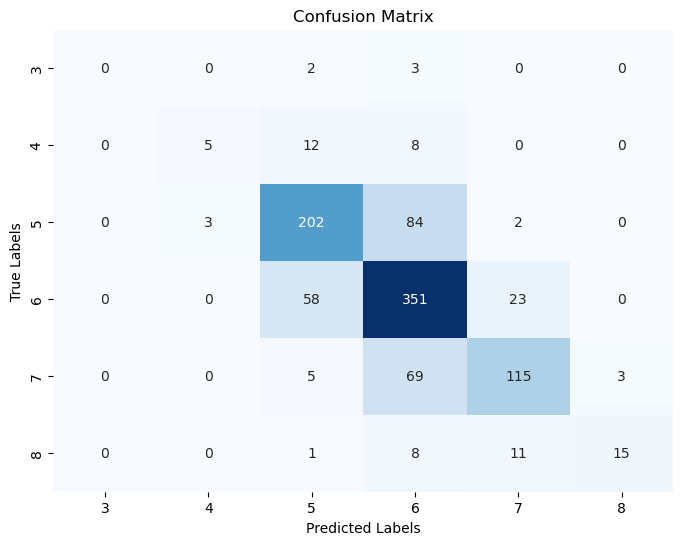

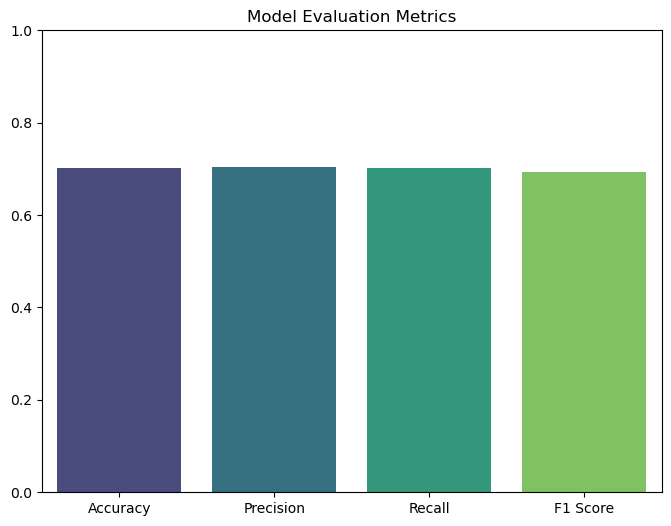

Random_Forest's Accuracy is: 0.7020408163265306
Random_Forest's Precision is:  0.7049794783382745
Random_Forest's Recall score is: 0.7020408163265306
Random_Forest's f1 score is: 0.6934477339603055


In [61]:
RF_criterion = 'gini'     #'entropy' or 'gini'
RF_estimators = 300
RF_depth = 25
RF_samples_split = 2
RF_samples_leaf = 1 
# train the model
RF_model = RandomForestClassifier(n_estimators=300,
                                  criterion='gini',
                                  max_depth=25,
                                  min_samples_split=2,
                                  min_samples_leaf=1,
                                  random_state = 0)
RF_model.fit(X_train_standard,y_train)

# test
y_pred = RF_model.predict(X_test_standard)


# score in this model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

#print result
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=[3,4,5,6,7,8],
            yticklabels=[3,4,5,6,7,8])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=scores, palette='viridis')
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1)
plt.show()
print("Random_Forest's Accuracy is:", accuracy)
print("Random_Forest's Precision is: ", precision)
print("Random_Forest's Recall score is:", recall)
print("Random_Forest's f1 score is:", f1)